# KMean Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step: 1 (loading the dataset)

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### step: 2 (encoding categorical variable Gender)

In [4]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

### step: 3 (choosing appropriate features)

In [5]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

### step: 4 (choosing different values of k)

In [6]:
k_values = [2, 3, 4]

### step: 5     (performing clustering)

In [7]:
def initialize_centroids(X, k):
    """Randomly selects k data points as initial centroids"""

    np.random.shuffle(X)
    return X[:k, :]

In [8]:
def assign_clusters(X, centroids):
    """Assign each data point to the closest centroid"""
    
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [9]:
def update_centroids(data, clusters, k):
    """Calculates new centroids as the mean of points in each cluster"""
    
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        new_centroids[i, :] = np.mean(cluster_points, axis=0)
    return new_centroids

In [10]:
def kmeans(data, k, max_iterations=100):
    """Custom K-means clustering implementation"""

    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        old_centroids = centroids
        centroids = update_centroids(data, clusters, k)

        # Check for convergence
        if np.all(old_centroids == centroids):
            break

    return clusters, centroids

### step: 6 (visualization)

<Figure size 1200x800 with 0 Axes>

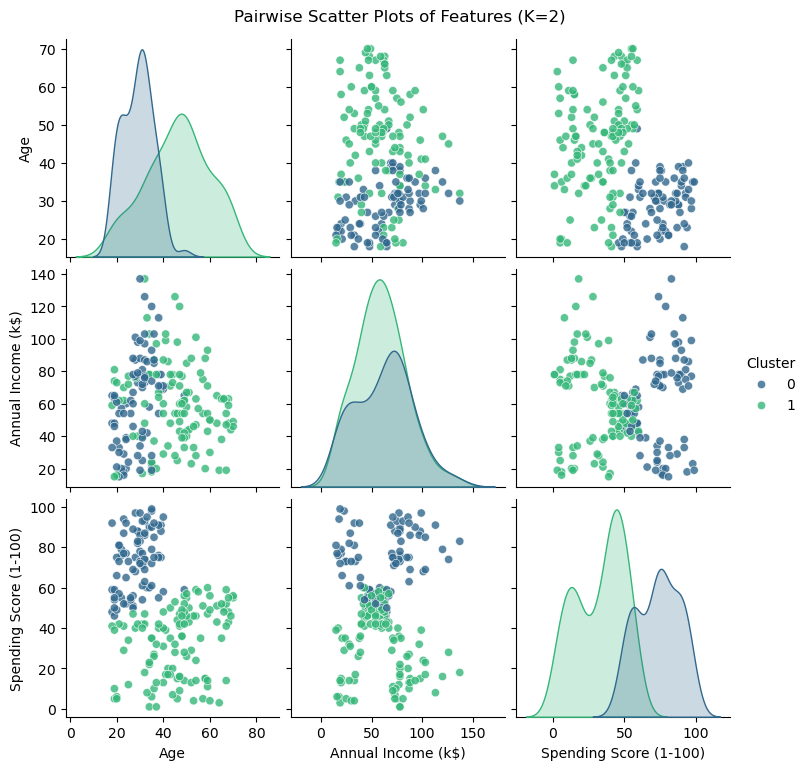

<Figure size 1200x800 with 0 Axes>

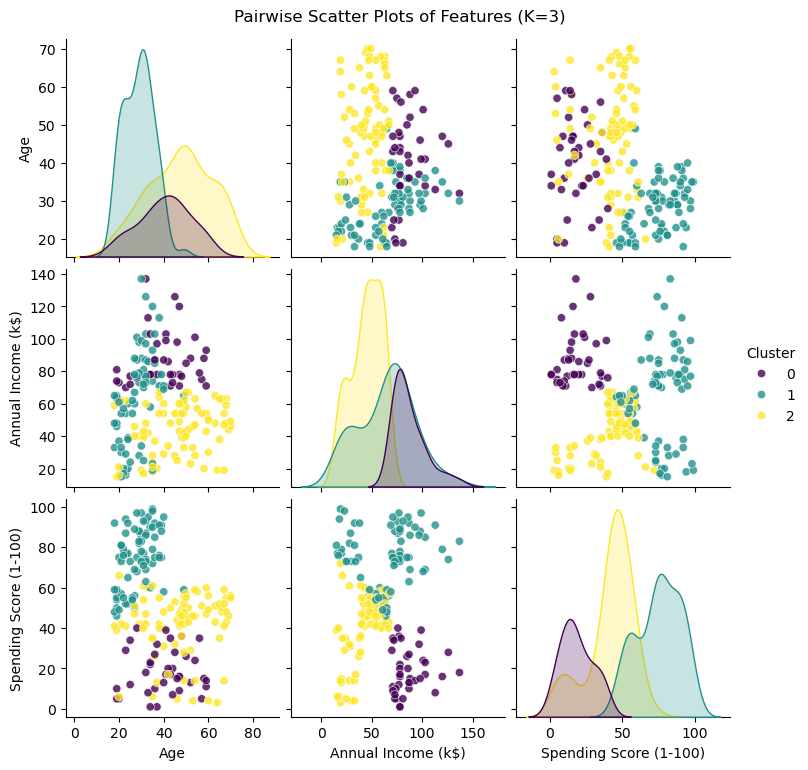

<Figure size 1200x800 with 0 Axes>

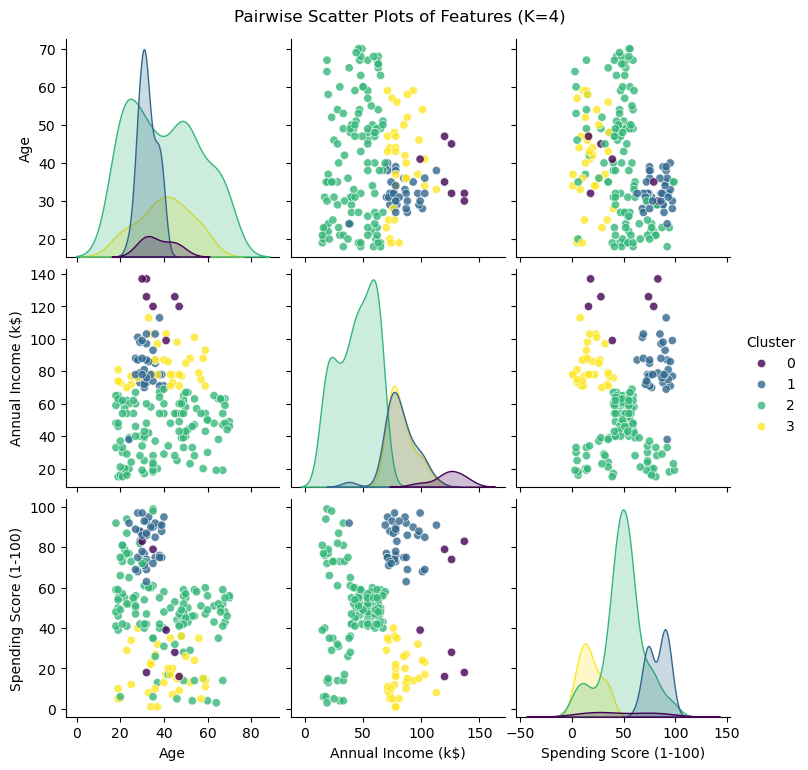

In [11]:
for k in k_values:
    clusters, medoids = kmeans(X, k)
    

    cluster_df = pd.DataFrame(X, columns=features)
    cluster_df['Cluster'] = clusters
    
    plt.figure(figsize=(12, 8))
    sns.pairplot(cluster_df, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.8})
    plt.suptitle(f'Pairwise Scatter Plots of Features (K={k})', y=1.02)
    plt.show()

# KMedoid Clustering

In [12]:
def manhattan_distance(x1, x2):
    """Calculates the Manhattan distance between two points"""
    
    return np.sum(np.abs(x1 - x2))


In [13]:
def initialize_medoids(X, k):
    """Randomly selects k data points as initial medoids"""

    medoid_indices = np.random.choice(X.shape[0], size=k, replace=False)
    medoids = X[medoid_indices]
    return medoids

In [14]:
def assign_clusters_medoids(X, medoids):
    """Assign each data point to the closest medoid based on Manhattan distance"""
        
    distances = np.sum(np.abs(X[:, np.newaxis] - medoids), axis=2)
    clusters = np.argmin(distances, axis=1)

    return clusters

In [15]:
def update_medoids(X, clusters, k):
    """Update medoids as the point with the lowest total distance to all other points in the cluster"""
    
    medoids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            dist_sum = np.sum(np.apply_along_axis(lambda x: np.sum(manhattan_distance(x, cluster_points)), axis=1, arr=cluster_points))
            medoids[i] = cluster_points[np.argmin(dist_sum)]
    return medoids

In [16]:
def kmedoids(X, k, max_iter=300):
    medoids = initialize_medoids(X, k)
    for _ in range(max_iter):
        clusters = assign_clusters_medoids(X, medoids)
        new_medoids = update_medoids(X, clusters, k)
        if np.array_equal(medoids, new_medoids):
            break
        medoids = new_medoids
    return clusters, medoids

<Figure size 1200x800 with 0 Axes>

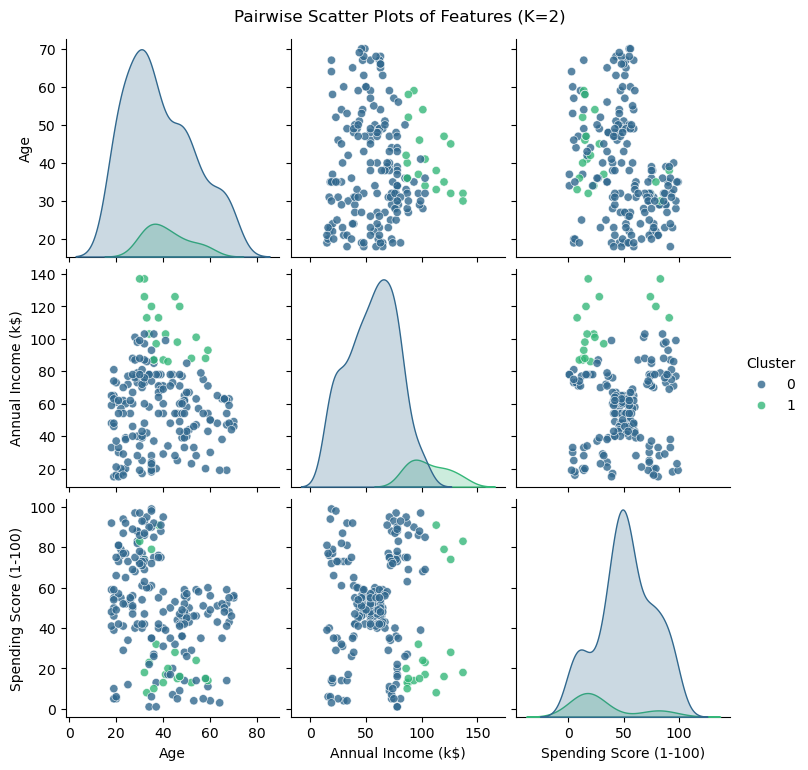

<Figure size 1200x800 with 0 Axes>

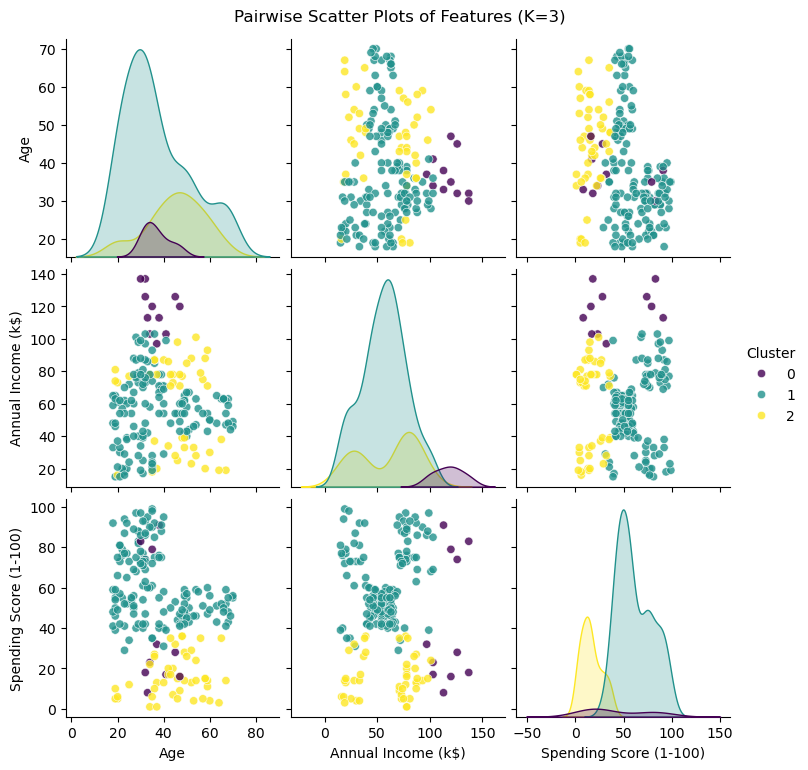

<Figure size 1200x800 with 0 Axes>

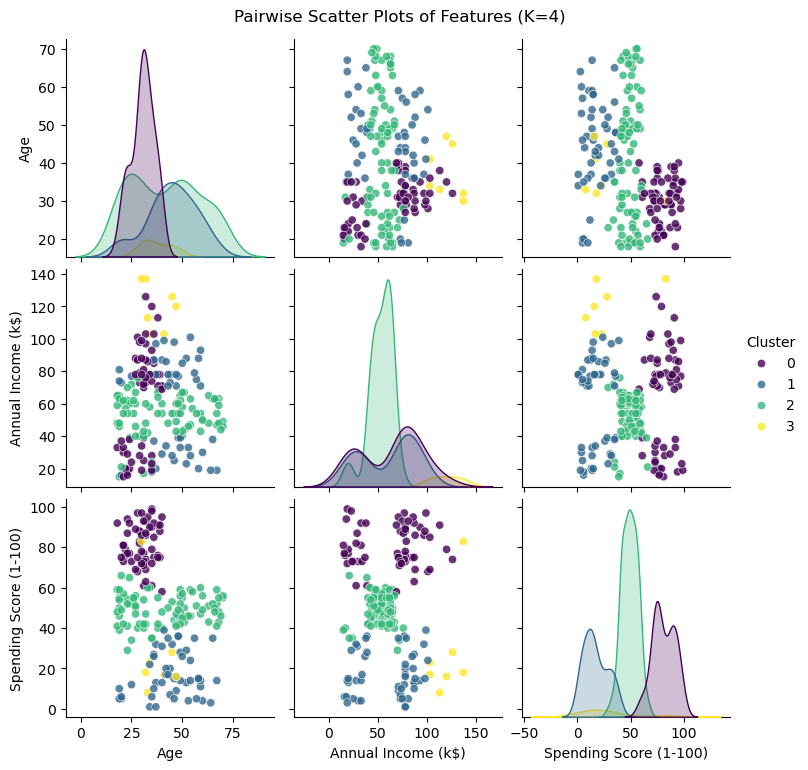

In [22]:
k_values = [2, 3, 4]

for k in k_values:
    clusters, medoids = kmedoids(X, k)
    
    # Create a DataFrame with cluster labels
    cluster_df = pd.DataFrame(X, columns=features)
    cluster_df['Cluster'] = clusters
    
    plt.figure(figsize=(12, 8))
    sns.pairplot(cluster_df, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.8})
    plt.suptitle(f'Pairwise Scatter Plots of Features (K={k})', y=1.02)
    plt.show()